In [71]:
#Load general packages
import pandas as pd
import numpy as np
import statistics as stats
from scipy import stats as s
import math
import random
import matplotlib.pyplot as plt
import psycopg2
from sqlalchemy import create_engine
from arch import arch_model
from arch.__future__ import reindexing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


#Import repeat functions 
%run functions-Copy1.ipynb

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [72]:
def GARCH_experiment(data_tuple):
    
    # Here we complete all of the needed data cleaning
    
    stock_data = data_tuple[0]
    stock_data['daily_change'] = stock_data['Close'].diff()
    stock_data['daily_change'] = stock_data['daily_change'].fillna(0)
    vol_data = data_tuple[1]
    
    
    stock_data = data_tuple[0]
    vol_data = data_tuple[1]
    vol_data['Date'] = pd.to_datetime(vol_data['Date'],format = "%Y-%m-%d")
    stock_data['Date'] = pd.to_datetime(stock_data['Date'], format = "%Y-%m-%d")
    result = stock_data.merge(vol_data,on='Date',how='inner')
    
    result['HV_Target'] = result['Hv10'].shift(-1)
    result['IV_Target'] = result['IvMean10'].shift(-1)
    
    
    # Now we will loop through the data set
    
    for increment in [100]:
        
        
        lower, upper, ev = [],[],[]
        number = len(result.index)
        i = 0
        
        while i < number:
            
            if i < increment:
                lower.append(0)
                upper.append(0)
                ev.append(0)
                i += 1
            else:
                values = result.iloc[i-increment:i]
                return(values)
                break
            
    
   

In [80]:
def Close_to_close(data):

    # calculate average daily return
    avg_daily_return = testing['returns'].mean()

    # calculate variance of daily returns
    var_daily_return = testing['returns'].var()

    # calculate standard deviation of daily returns
    std_daily_return = np.sqrt(var_daily_return)

    # annualize standard deviation of daily returns
    trading_days_per_year = 252 # assume 252 trading days in a year
    annualized_std = std_daily_return * np.sqrt(trading_days_per_year)
    
    print( np.sqrt(trading_days_per_year))

    print(f"The close to close historical volatility is: {round(annualized_std*100, 2)}%")
    
    
testing = pd.read_csv('Remaining_Tickers-Copy1.csv')
tickers = list(testing['Ticker'])[12]
print(tickers)
dataframe = Pull_Data(tickers)
test = GARCH_experiment(dataframe)
testing = test[['Close','Daily_Percent_Change','Hv10','IvMean10','HV_Target','IV_Target']]
testing['returns'] = np.log(testing['Close'] / testing['Close'].shift(1))
testing = testing.iloc[1:11]
Close_to_close(testing)
#testing.head(20)

#Close_to_close(testing.head(10)['Daily_Percent_Change'])


GOOG
15.874507866387544
The close to close historical volatility is: 30.56%


# GARCH on Returns | vol='GARCH'

In [81]:
data = pd.read_csv('Remaining_Tickers-Copy1.csv')
tickers = list(data['Ticker'])[57]
print(tickers)


dataframe = Pull_Data(tickers)
a = GARCH_experiment(dataframe)
print(a)


HAS
         Date      Close  Daily_Percent_Change   Volume  daily_change    Hv10  \
0  2016-01-04  66.959999             -0.005938  1214900     -0.400002  0.1384   
1  2016-01-05  68.180000              0.018220  1661000      1.220001  0.1698   
2  2016-01-06  69.889999              0.025081  3295000      1.709999  0.2191   
3  2016-01-07  69.120003             -0.011017  1808100     -0.769997  0.2385   
4  2016-01-08  68.040001             -0.015625  1231000     -1.080002  0.2537   
..        ...        ...                   ...      ...           ...     ...   
95 2016-05-19  84.870003             -0.000353   493600     -0.029999  0.1631   
96 2016-05-20  84.389999             -0.005656   872500     -0.480003  0.1021   
97 2016-05-23  84.970001              0.006873   457500      0.580002  0.0926   
98 2016-05-24  86.720001              0.020596   849500      1.750000  0.1543   
99 2016-05-25  86.760002              0.000461   753500      0.040001  0.1544   

      Hv20    Hv30    H

Iteration:      1,   Func. Count:      6,   Neg. LLF: 232691151.00112143
Iteration:      2,   Func. Count:     13,   Neg. LLF: 462.1123206585069
Iteration:      3,   Func. Count:     21,   Neg. LLF: 202.43282897580877
Iteration:      4,   Func. Count:     27,   Neg. LLF: 187.12365927269133
Iteration:      5,   Func. Count:     33,   Neg. LLF: 185.43533388256097
Iteration:      6,   Func. Count:     39,   Neg. LLF: 184.75177390209163
Iteration:      7,   Func. Count:     45,   Neg. LLF: 184.74739486634564
Iteration:      8,   Func. Count:     50,   Neg. LLF: 184.7472494168983
Iteration:      9,   Func. Count:     55,   Neg. LLF: 184.74723757652066
Iteration:     10,   Func. Count:     60,   Neg. LLF: 184.74723305821902
Iteration:     11,   Func. Count:     64,   Neg. LLF: 184.7472330584898
Optimization terminated successfully    (Exit mode 0)
            Current function value: 184.74723305821902
            Iterations: 11
            Function evaluations: 64
            Gradient evalua

C:\Users\rjk13\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


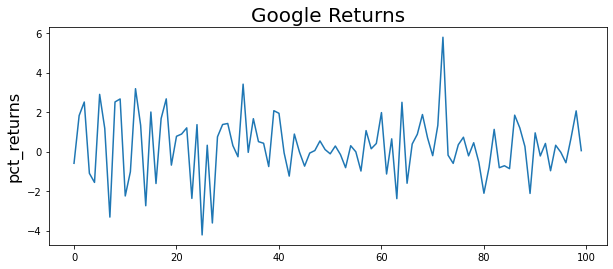

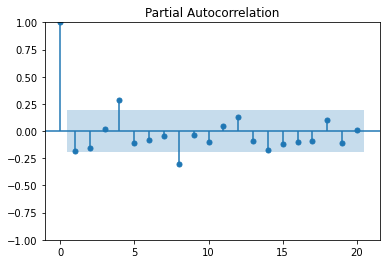

In [82]:
garch_model = arch_model(a['Daily_Percent_Change']*100,p=1,q=1,mean='constant',vol='GARCH',dist='normal')
res = garch_model.fit()
print(res.summary())
forcast = res.forecast(horizon=1)
#print(forcast.residual_variance)
print(f"The volality forcast is {np.sqrt(forcast.variance)* np.sqrt(252)*.01}")


plt.figure(figsize=(10,4))
plt.plot(a['Daily_Percent_Change']*100)
plt.ylabel('pct_returns',fontsize=16)
plt.title('Google Returns',fontsize=20)


plot_pacf(a['Daily_Percent_Change'])
plt.show()




#print(f"The forecast is {forcast.mean}")
#print(forcast.residual_variance)

#print(forcast.mean)

# GARCH on Returns | vol='FIGARCH'

In [86]:
garch_model = arch_model(a['Daily_Percent_Change']*100,p=1,q=1,mean='constant',vol='FIGARCH',dist='normal')
res = garch_model.fit()
print(res.summary())
forcast = res.forecast(horizon=1)
#print(forcast.residual_variance)
print(f"The volality forcast is {np.sqrt(forcast.variance)* np.sqrt(252)*.01}")
#print(forcast.mean)

Iteration:      1,   Func. Count:      7,   Neg. LLF: 304.21748029198136
Iteration:      2,   Func. Count:     15,   Neg. LLF: 185.70862041665345
Iteration:      3,   Func. Count:     22,   Neg. LLF: 185.02386335101755
Iteration:      4,   Func. Count:     28,   Neg. LLF: 185.0222118649638
Iteration:      5,   Func. Count:     34,   Neg. LLF: 185.00729466085264
Iteration:      6,   Func. Count:     40,   Neg. LLF: 185.01200251277697
Iteration:      7,   Func. Count:     47,   Neg. LLF: 184.98502337637018
Iteration:      8,   Func. Count:     53,   Neg. LLF: 184.97810614821978
Iteration:      9,   Func. Count:     59,   Neg. LLF: 184.97800770257055
Iteration:     10,   Func. Count:     65,   Neg. LLF: 184.97800404053012
Iteration:     11,   Func. Count:     70,   Neg. LLF: 184.9780039645241
Optimization terminated successfully    (Exit mode 0)
            Current function value: 184.97800404053012
            Iterations: 11
            Function evaluations: 70
            Gradient evalu

# GARCH on Returns | vol='EGARCH'

In [87]:
garch_model = arch_model(a['Daily_Percent_Change']*100,p=1,q=1,mean='constant',vol='EGARCH',dist='normal')
res = garch_model.fit()
print(res.summary())
forcast = res.forecast(horizon=1)
#print(forcast.residual_variance)
print(f"The volality forcast is {np.sqrt(forcast.variance)* np.sqrt(252)*.01}")
#print(forcast.mean)

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5455449.808356505
Iteration:      2,   Func. Count:     14,   Neg. LLF: 1328942953.9727144
Iteration:      3,   Func. Count:     21,   Neg. LLF: 271.4116754476451
Iteration:      4,   Func. Count:     28,   Neg. LLF: 186.93738323464945
Iteration:      5,   Func. Count:     34,   Neg. LLF: 183.2125277545279
Iteration:      6,   Func. Count:     40,   Neg. LLF: 183.20256853189701
Iteration:      7,   Func. Count:     45,   Neg. LLF: 183.20256727667947
Iteration:      8,   Func. Count:     49,   Neg. LLF: 183.20256727666074
Optimization terminated successfully    (Exit mode 0)
            Current function value: 183.20256727667947
            Iterations: 8
            Function evaluations: 49
            Gradient evaluations: 8
                      Constant Mean - EGARCH Model Results                      
Dep. Variable:     Daily_Percent_Change   R-squared:                       0.000
Mean Model:               Constant Mean   Adj. R-

# Now consider models trained on HV10

KMB


C:\Users\rjk13\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


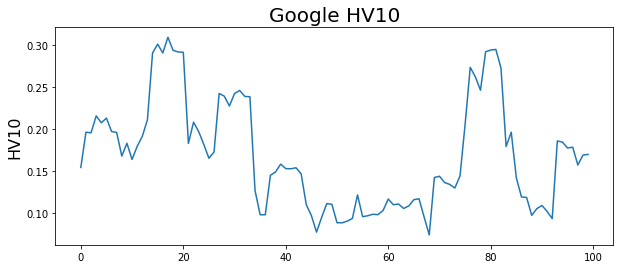

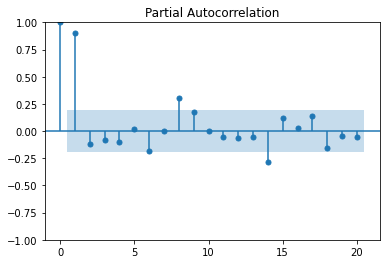

In [88]:
data = pd.read_csv('Remaining_Tickers-Copy1.csv')
tickers = list(data['Ticker'])[102]
print(tickers)
dataframe = Pull_Data(tickers)
a = GARCH_experiment(dataframe)
plt.figure(figsize=(10,4))
plt.plot(a['Hv10'])
plt.ylabel('HV10',fontsize=16)
plt.title('Google HV10',fontsize=20)

#print(a['Daily_Percent_Change'])

plot_pacf(a['Hv10'])
plt.show()

In [89]:
garch_model_two = arch_model(a['Hv10'],p=1,q=1,mean='constant',vol='GARCH',dist='normal')
res_two = garch_model_two.fit()
print(res_two.summary())
forcast = res_two.forecast(horizon=1)
#print(forcast.residual_variance)
print(f"The volality forcast is {forcast.mean}")
#print(forcast.mean)

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3863108.136611479
Iteration:      2,   Func. Count:     15,   Neg. LLF: -25.52485013106263
Iteration:      3,   Func. Count:     21,   Neg. LLF: 2348.838955417651
Iteration:      4,   Func. Count:     27,   Neg. LLF: -71.94230024063306
Iteration:      5,   Func. Count:     33,   Neg. LLF: 3071.623307921536
Iteration:      6,   Func. Count:     39,   Neg. LLF: -106.76736152891607
Iteration:      7,   Func. Count:     45,   Neg. LLF: -151.81660328338995
Iteration:      8,   Func. Count:     50,   Neg. LLF: -130.7957181110351
Iteration:      9,   Func. Count:     56,   Neg. LLF: -130.90368065704882
Iteration:     10,   Func. Count:     63,   Neg. LLF: -154.8430773046046
Iteration:     11,   Func. Count:     68,   Neg. LLF: -104.71814454478148
Iteration:     12,   Func. Count:     74,   Neg. LLF: -152.97893975810715
Iteration:     13,   Func. Count:     81,   Neg. LLF: -156.74269902386683
Iteration:     14,   Func. Count:     86,   Neg.

C:\Users\rjk13\AppData\Local\Programs\Python\Python310\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00414. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


# Now consider models trained on IV10

KMB


C:\Users\rjk13\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


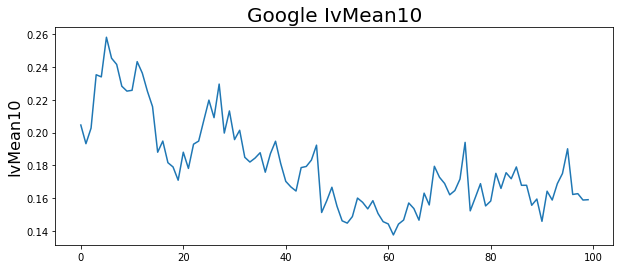

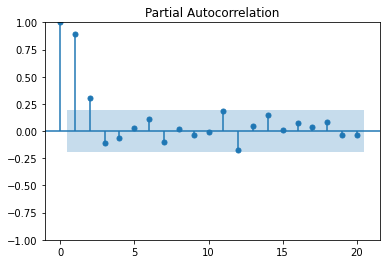

In [90]:
data = pd.read_csv('Remaining_Tickers-Copy1.csv')
tickers = list(data['Ticker'])[102]
print(tickers)
dataframe = Pull_Data(tickers)
a = GARCH_experiment(dataframe)
plt.figure(figsize=(10,4))
plt.plot(a['IvMean10'])
plt.ylabel('IvMean10',fontsize=16)
plt.title('Google IvMean10',fontsize=20)

#print(a['Daily_Percent_Change'])

plot_pacf(a['IvMean10'])
plt.show()

In [91]:
garch_model_three = arch_model(a['IvMean10'],p=1,q=1,mean='constant',vol='GARCH',dist='normal')
res_three = garch_model_three.fit()
print(res_three.summary())
forcast = res_three.forecast(horizon=1)
#print(forcast.residual_variance)
print(f"The volality forcast is {forcast.mean}")
#print(forcast.mean)

Iteration:      1,   Func. Count:      6,   Neg. LLF: 90472891.53056915
Iteration:      2,   Func. Count:     18,   Neg. LLF: 2358982.076929705
Iteration:      3,   Func. Count:     28,   Neg. LLF: 3529899.764088245
Iteration:      4,   Func. Count:     38,   Neg. LLF: -240.1253630168201
Optimization terminated successfully    (Exit mode 0)
            Current function value: -240.1253639579234
            Iterations: 8
            Function evaluations: 38
            Gradient evaluations: 4
                     Constant Mean - GARCH Model Results                      
Dep. Variable:               IvMean10   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                240.125
Distribution:                  Normal   AIC:                          -472.251
Method:            Maximum Likelihood   BIC:                          -461.830
                             

C:\Users\rjk13\AppData\Local\Programs\Python\Python310\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0007513. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
